In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

In [2]:
features = list()
with open("data/UCI_HAR_Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [3]:
len(features)

561

# Reading Data

In [7]:
train_df = pd.read_csv("data/UCI_HAR_Dataset/train/X_train.txt", delim_whitespace = True)
train_df.columns = features

train_df["subject_id"] = pd.read_csv("data/UCI_HAR_Dataset/train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

train_df["activity"] = pd.read_csv("data/UCI_HAR_Dataset/train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv("data/UCI_HAR_Dataset/train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [8]:
print("Size of Train data = {}".format(train_df.shape))

Size of Train data = (7351, 564)


In [9]:
test_df = pd.read_csv("data/UCI_HAR_Dataset/test/X_test.txt", delim_whitespace = True)
test_df.columns = features
test_df["subject_id"] = pd.read_csv("data/UCI_HAR_Dataset/test/subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv("data/UCI_HAR_Dataset/test/y_test.txt", header = None, squeeze = True)

activity = pd.read_csv("data/UCI_HAR_Dataset/test/y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


In [10]:
print("Size of Test data = {}".format(test_df.shape))

Size of Test data = (2946, 564)


## Data Cleaning

In [11]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [12]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


## Checking for imbalance in data

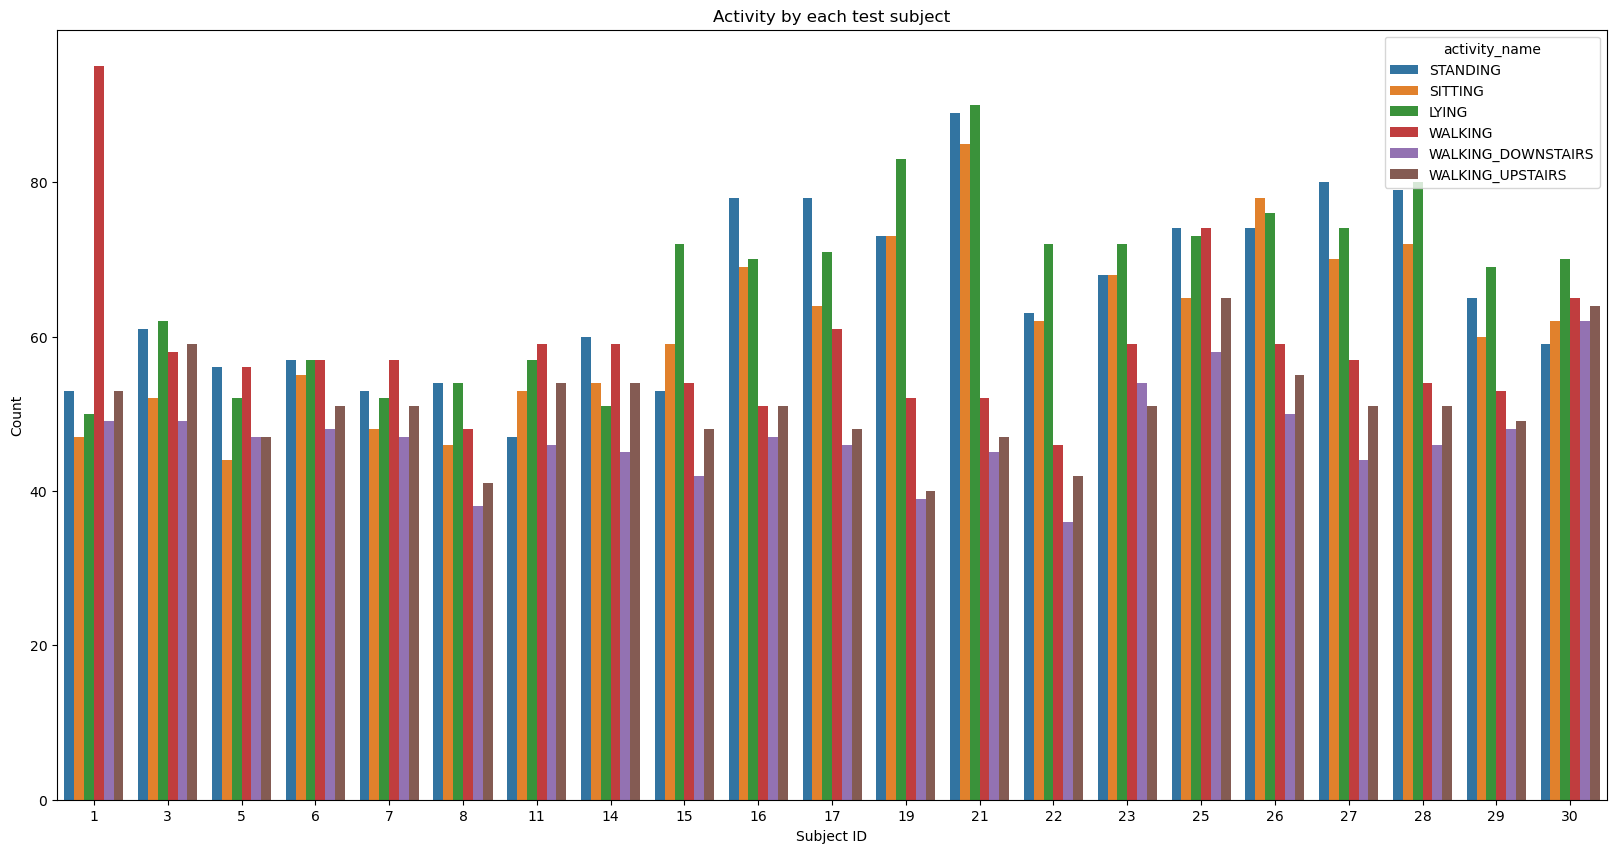

In [13]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "subject_id", hue = "activity_name", data = train_df)
plt.xlabel("Subject ID")
plt.ylabel("Count")
plt.title("Activity by each test subject")
plt.show()

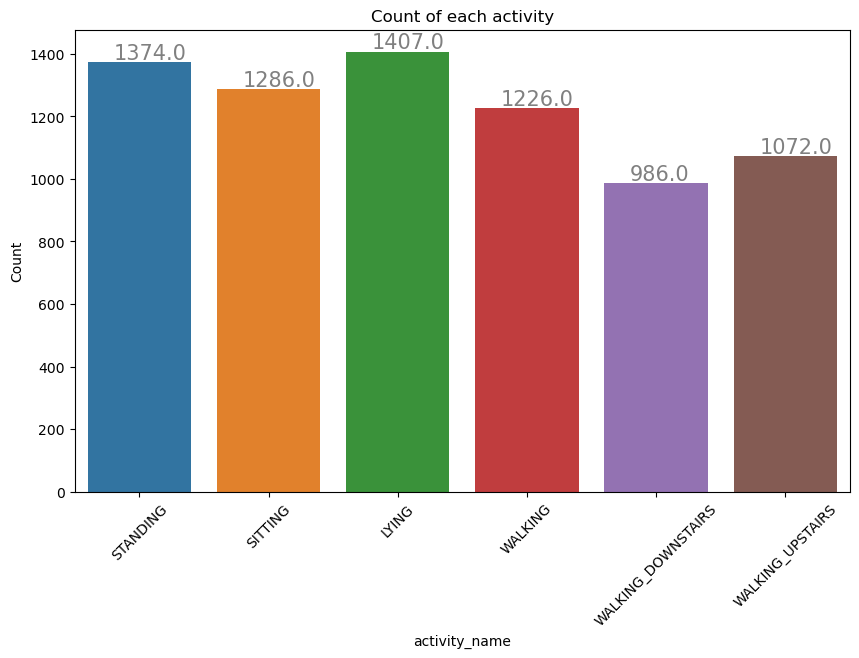

In [14]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = "activity_name", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 15, color = "grey")
plt.title("Count of each activity")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

In [15]:
columns = train_df.columns
columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject_id',
       'activity', 'activity_name'],
      dtype='object', length=564)

In [16]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')

train_df.columns = columns
test_df.columns = columns

In [17]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity', 'activity_name'],
      dtype='object', length=564)

In [18]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [19]:
test_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


## Saving Dataframe for future use

In [21]:
train_df.to_csv("data/train/train_df.csv", index = False)
test_df.to_csv("data/test/test_df.csv", index = False)

In [22]:
train_df = pd.read_csv("data/train/train_df.csv")
test_df = pd.read_csv("data/test/test_df.csv")

## Exploratory Data Analysis
Feature information from domain knowledge

1. Static: We have three types static features where test subject is in rest:
- Sitting
- Standing
- Lying

2. Dynamic: We have three types of dynamic features where test subject is in motion:
- Walking
- Walking_Downstairs
- Walking_Upstairs

#### Magnitude of Body Accelerator Mean Matters

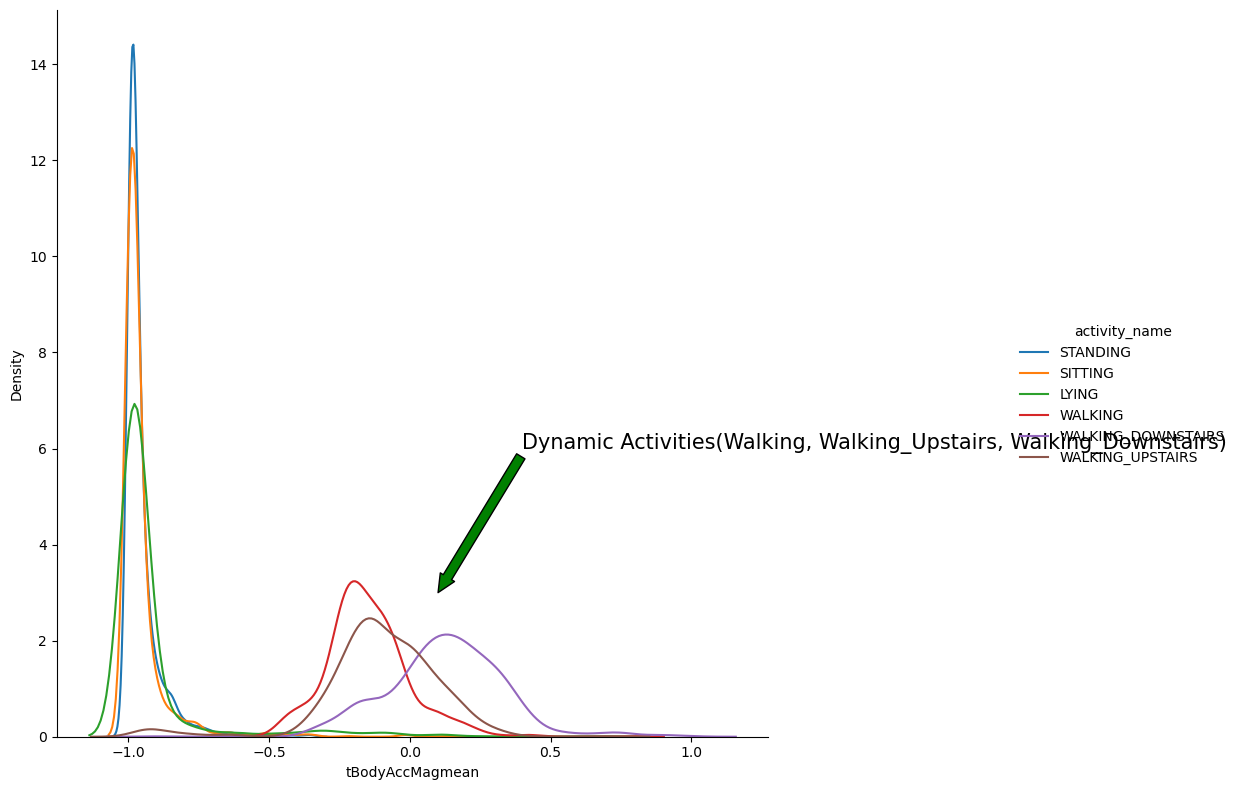

In [25]:
facetgrid = sns.FacetGrid(data = train_df, hue = "activity_name", height=8) #size = 8)
facetgrid.map(sns.distplot, "tBodyAccMagmean",hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='green', width = 7, headlength = 15), size = 15)
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='green', width = 7, headlength = 13), size = 15)
plt.show()

Text(-0.7, 27, 'Static Activities(Sitting, Standing, Lying)')

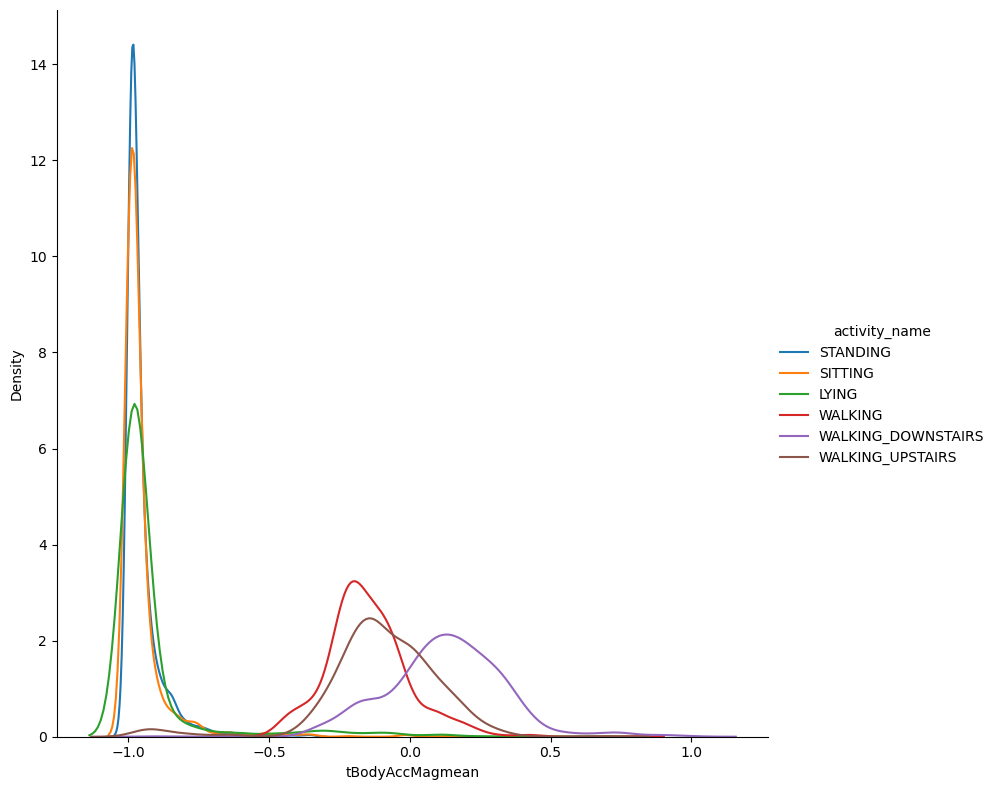

In [24]:
facetgrid = sns.FacetGrid(data=train_df, hue="activity_name", height=8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist=False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
                arrowprops=dict(facecolor='green', width=7, headlength=15), size=15)


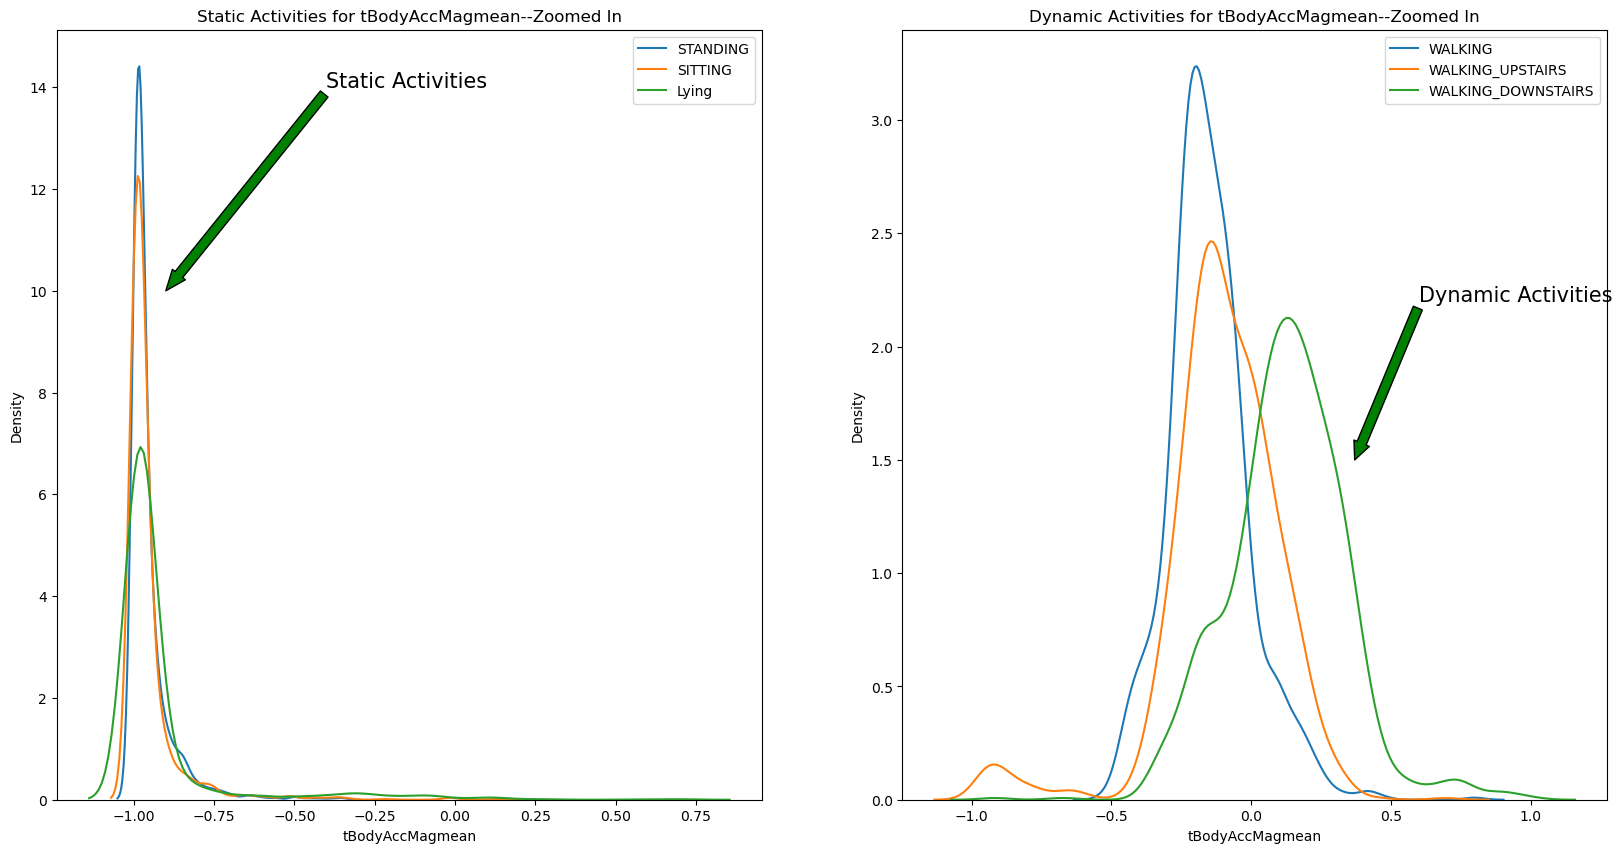

In [42]:
#let's plot "tBodyAccMagmean" for both static and dynamic activites separately to analysis them in more detail
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title("Static Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_standing["tBodyAccMagmean"], hist = False, label = "STANDING")
sns.distplot(df_sitting["tBodyAccMagmean"], hist = False, label = "SITTING")
sns.distplot(df_lying["tBodyAccMagmean"], hist = False, label = "Lying")
plt.legend()
plt.annotate('Static Activities', xy=(-0.90, 10), xytext=(-0.4, 14), arrowprops=dict(facecolor='green', width = 7, headlength = 15), size = 15)

plt.subplot(1,2,2)

plt.title("Dynamic Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_walking["tBodyAccMagmean"], hist = False, label = "WALKING")
sns.distplot(df_walking_upstairs["tBodyAccMagmean"], hist = False, label = "WALKING_UPSTAIRS")
sns.distplot(df_walking_downstairs["tBodyAccMagmean"], hist = False, label = "WALKING_DOWNSTAIRS")
plt.legend()
plt.annotate('Dynamic Activities', xy=(0.37, 1.5), xytext=(0.60, 2.2), arrowprops=dict(facecolor='green', width = 7, headlength = 13), size = 15)


plt.show()

Observation
From above two plots we can clearly observe that how well "tBodyAccMagmean"--which is the magnitude of the mean of body acceleration in time-domain meaured by accelerometer--is able to separate static activity from dynamic activity.

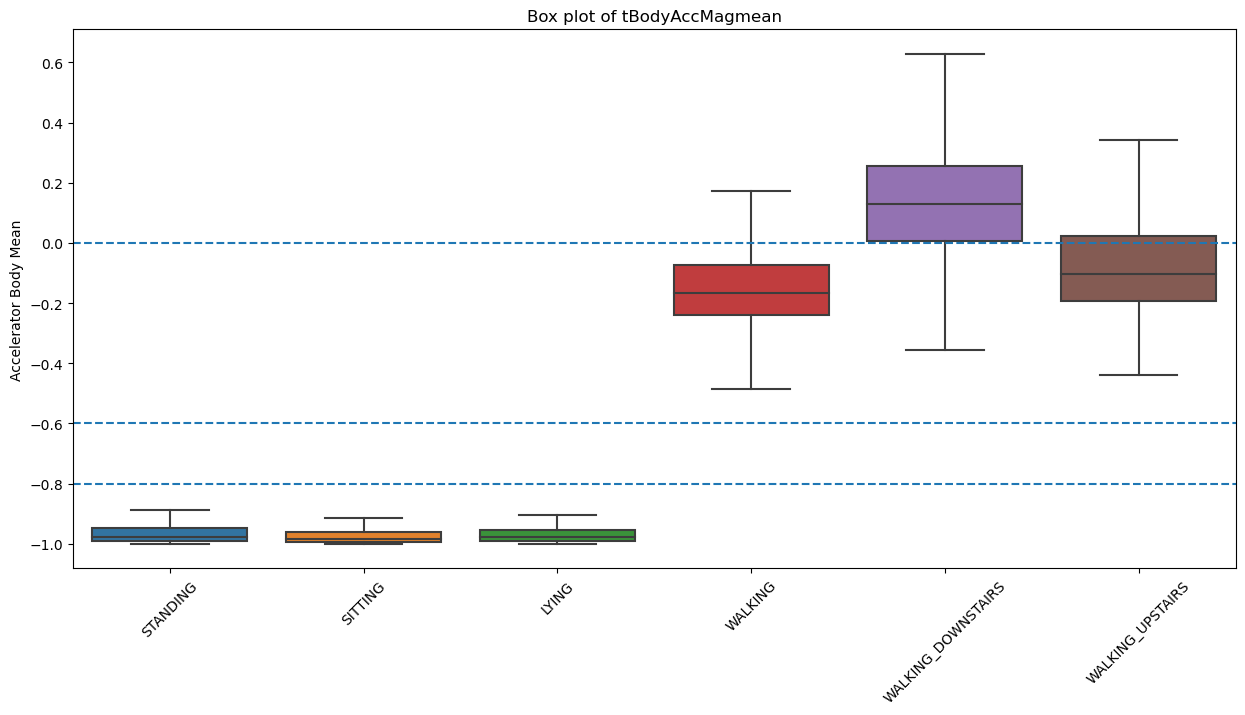

In [43]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "tBodyAccMagmean", showfliers = False, data = train_df)
plt.axhline(y = -0.8, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.axhline(y = -0.6, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean")
plt.ylabel("Accelerator Body Mean")
plt.xlabel("Activity Name")
plt.xlabel("")
plt.xticks(rotation = 45)
plt.show()

## Observations:

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### Accelerator Gravity Mean on X-axis can be quite importan

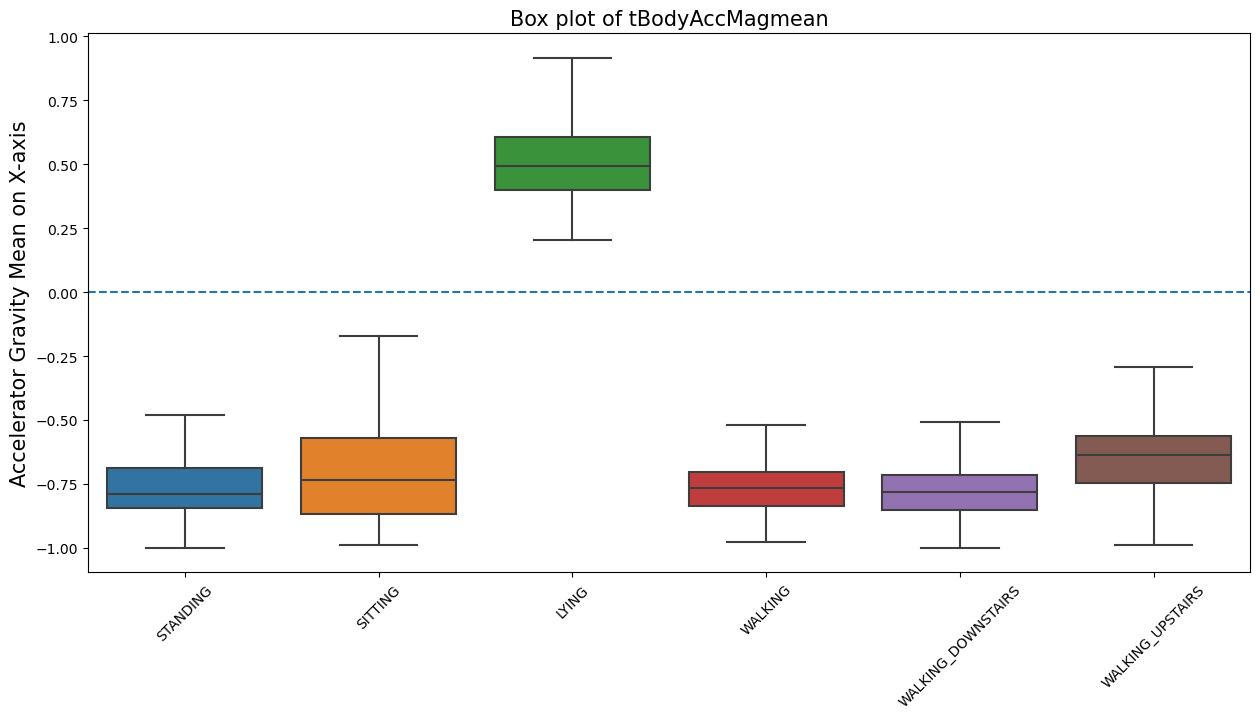

In [44]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "activity_name", y = "angleXgravityMean", showfliers = False, data = train_df)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.xticks(rotation = 45)
plt.show()

### Observation

- If Acc Gravity Mean > 0, we can infer that the activity will most likely be Lying.
- If Acc Gravity Mean < 0, we can infer that the activity can be anything but Lying.

In [72]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["subject_id", "activity", "activity_name"], axis=1)
    data_label = train_df["activity_name"]
    applying_tsne = TSNE(
        n_components=2, perplexity=perplexity, n_iter=1000, verbose=2,n_jobs = -1)
    reduced_dim = applying_tsne.fit_transform(data)
    d = {'Dimension_1': applying_tsne.embedding_[:, 0], 'Dimension_2': applying_tsne.embedding_[:, 1], "activities": data_label}
    df = pd.DataFrame(data=d)
    print("Plotting TSNE Visualization...")
    sns.set_style('whitegrid')
    plt.figure(figsize = (15,9))
    sns.scatterplot("Dimension_1", "Dimension_2", hue = "activities", data = df,style = "activities")
    plt.title("TSNE Plot for Perplexity "+str(perplexity))
    plt.show()

In [ ]:
"""perplexities = [5, 10, 20, 40, 100]
for perplexity in perplexities:
    plt_tsne(perplexity, train_df)"""

In [58]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

x_test = test_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_test = test_df["activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7351, 561), (7351,), (2946, 561), (2946,))

## Task 2 – Use a dimensionality reduction technique before using DBSCAN on the dataset.

- Does it have any effect on your code efficiency, both in terms of computational
efficiency and clustering output?

- How do you compare the outcome of this model with the model where the
dimensionality reduction technique was not applied on the dataset?

In [54]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [56]:
# Load the data
train_df.head(5)


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [57]:
test_df.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


# PCA

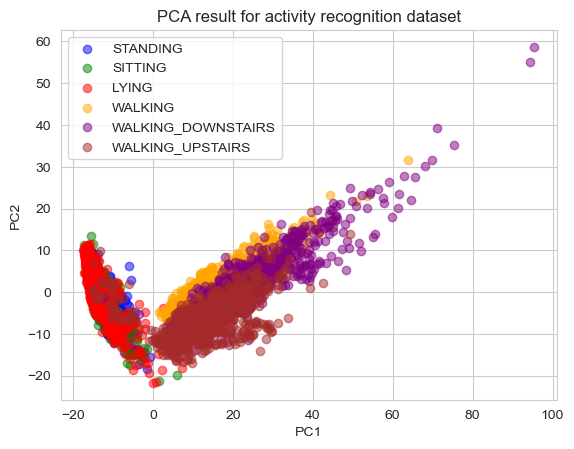

In [59]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

# Plot the PCA result
fig, ax = plt.subplots()
colors = ["blue", "green", "red", "orange", "purple", "brown"]
for i, activity in enumerate(train_df["activity_name"].unique()):
    mask = train_df["activity_name"] == activity
    ax.scatter(x_train_pca[mask, 0], x_train_pca[mask, 1], c=colors[i], label=activity, alpha=0.5)
ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA result for activity recognition dataset")
plt.show()

## Task 1 – Your main task is to use DBSCAN to do clustering on the given dataset. Your
code needs to consider the following aspects, and this also should be reflected in your final
report.
- How do you choose the number of clusters?
- How do you find the optimal parameters’ values?
- What data processing steps do you apply and why?

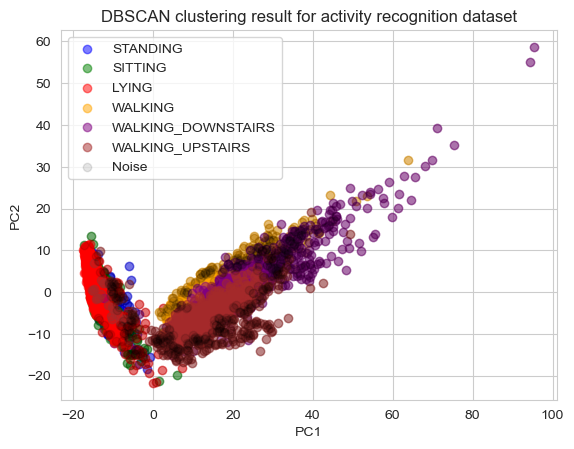

In [60]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_train_pca)
labels = dbscan.labels_

# Plot the clustering result
fig, ax = plt.subplots()
colors = ["blue", "green", "red", "orange", "purple", "brown", "gray"]
for i, activity in enumerate(train_df["activity_name"].unique()):
    mask = train_df["activity_name"] == activity
    ax.scatter(x_train_pca[mask, 0], x_train_pca[mask, 1], c=colors[i], label=activity, alpha=0.5)
ax.scatter(x_train_pca[labels == -1, 0], x_train_pca[labels == -1, 1], c="black", label="Noise", alpha=0.1)
ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("DBSCAN clustering result for activity recognition dataset")
plt.show()

## DBSCAN AFTER PCA

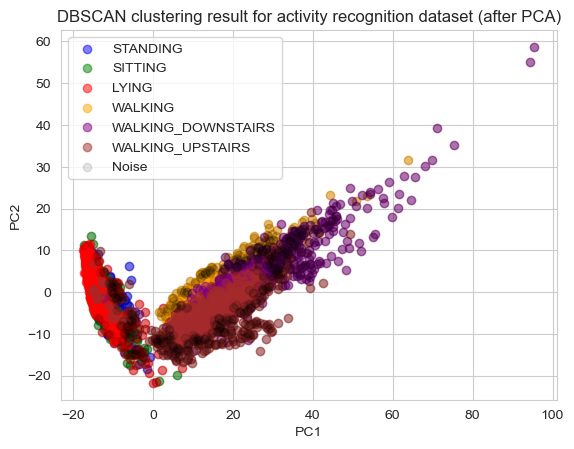

In [61]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_train_pca)
labels = dbscan.labels_

# Plot the clustering result
fig, ax = plt.subplots()
colors = ["blue", "green", "red", "orange", "purple", "brown", "gray"]
for i, activity in enumerate(train_df["activity_name"].unique()):
    mask = train_df["activity_name"] == activity
    ax.scatter(x_train_pca[mask, 0], x_train_pca[mask, 1], c=colors[i], label=activity, alpha=0.5)
ax.scatter(x_train_pca[labels == -1, 0], x_train_pca[labels == -1, 1], c="black", label="Noise", alpha=0.1)
ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("DBSCAN clustering result for activity recognition dataset (after PCA)")
plt.show()

# DBSCAN WITHOUT PCA

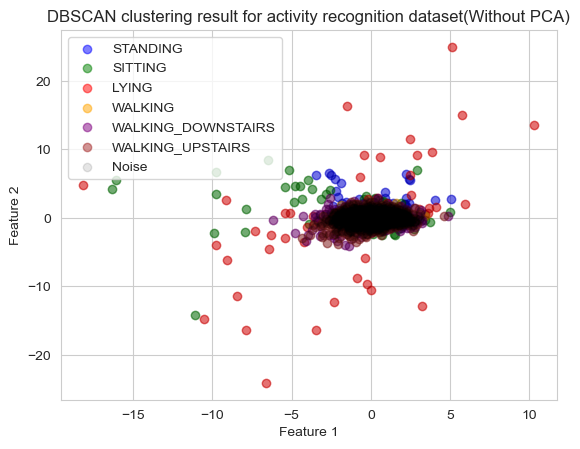

In [63]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_train_scaled)
labels = dbscan.labels_

# Plot the clustering result
fig, ax = plt.subplots()
colors = ["blue", "green", "red", "orange", "purple", "brown", "gray"]
for i, activity in enumerate(train_df["activity_name"].unique()):
    mask = train_df["activity_name"] == activity
    ax.scatter(x_train_scaled[mask, 0], x_train_scaled[mask, 1], c=colors[i], label=activity, alpha=0.5)
ax.scatter(x_train_scaled[labels == -1, 0], x_train_scaled[labels == -1, 1], c="black", label="Noise", alpha=0.1)
ax.legend()
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("DBSCAN clustering result for activity recognition dataset(Without PCA)")
plt.show()






In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Define the parameter ranges to search over
eps_range = np.arange(0.1, 2.1, 0.1)
min_samples_range = np.arange(2, 10)

# Initialize variables to store the best parameters and clustering result
best_eps = None
best_min_samples = None
best_score = -1

# Perform grid search
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(x_train)
        labels = dbscan.labels_
        score = silhouette_score(x_train, labels)
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# Fit DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(x_train)
labels = dbscan.labels_


In [69]:
eps_range = np.arange(0.1, 2.1, 0.1)
min_samples_range = np.arange(2, 11)

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(x_train)
        labels = dbscan.labels_
        if len(set(labels)) > 1: # Check if there is more than one cluster
            score = silhouette_score(x_train, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Fit DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(x_train)
labels = dbscan.labels_


In [70]:
# Print the cluster assignments
print(labels)


[-1 -1 -1 ... -1 -1 -1]


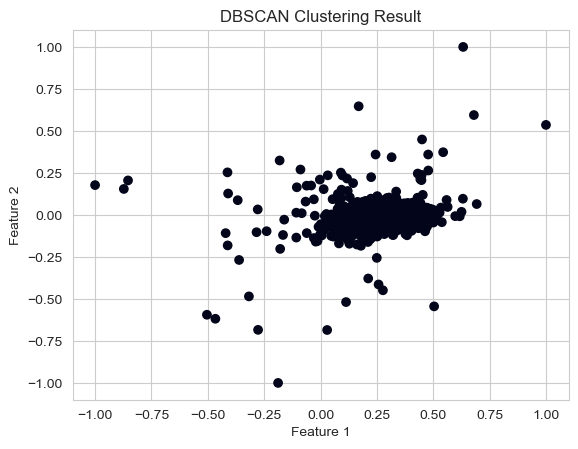

In [71]:
# Plot the clusters
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Result')
plt.show()


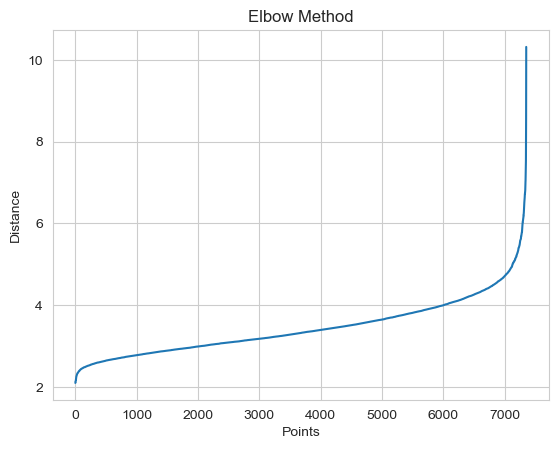

In [67]:
from sklearn.neighbors import NearestNeighbors
# find the k nearest neighbors for each point
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(x_train)
distances, indices = nbrs.kneighbors(x_train)

# sort the distances and plot the results
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)

# find the elbow in the plot
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Elbow Method")
plt.show()